## Analyse marché cryptomonnaie

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from elasticsearch import Elasticsearch
import elasticsearch.helpers
import datetime

In [71]:
# Query ES pour recuperation données

es = Elasticsearch('127.0.0.1',
        http_auth=('elastic', 'iTDviTnRisEubZjSx739'),
        port=9200)

body={"query": {"match_all": {}}}

results_ada = elasticsearch.helpers.scan(es, query=body, index="ada_historical")
results_bnb = elasticsearch.helpers.scan(es, query=body, index="bnb_historical")
results_btc = elasticsearch.helpers.scan(es, query=body, index="btc_historical")
results_doge = elasticsearch.helpers.scan(es, query=body, index="doge_historical")
results_dot = elasticsearch.helpers.scan(es, query=body, index="dot_historical")
results_eth = elasticsearch.helpers.scan(es, query=body, index="eth_historical")
results_link = elasticsearch.helpers.scan(es, query=body, index="link_historical")
results_ltc = elasticsearch.helpers.scan(es, query=body, index="ltc_historical")
results_sol = elasticsearch.helpers.scan(es, query=body, index="sol_historical")
results_xrp = elasticsearch.helpers.scan(es, query=body, index="xrp_historical")

crypto = {}
crypto['ada'] = pd.DataFrame.from_dict([document['_source'] for document in results_ada])
crypto['bnb'] = pd.DataFrame.from_dict([document['_source'] for document in results_bnb])
crypto['btc'] = pd.DataFrame.from_dict([document['_source'] for document in results_btc])
crypto['doge'] = pd.DataFrame.from_dict([document['_source'] for document in results_doge])
crypto['dot'] = pd.DataFrame.from_dict([document['_source'] for document in results_dot])
crypto['eth'] = pd.DataFrame.from_dict([document['_source'] for document in results_eth])
crypto['link'] = pd.DataFrame.from_dict([document['_source'] for document in results_link])
crypto['ltc'] = pd.DataFrame.from_dict([document['_source'] for document in results_ltc])
crypto['sol'] = pd.DataFrame.from_dict([document['_source'] for document in results_sol])
crypto['xrp'] = pd.DataFrame.from_dict([document['_source'] for document in results_xrp])

crypto

{'ada':       Marketcap_Dominance  Price_Low                @timestamp  Volatility  \
 0                1.971481   1.320487  2021-12-11T23:00:00.000Z    0.949921   
 1                2.108303   1.410606  2021-04-14T22:00:00.000Z    0.918738   
 2                1.908383   1.341130  2021-12-07T23:00:00.000Z    0.888314   
 3                1.918764   1.198555  2021-04-10T22:00:00.000Z    1.166274   
 4                2.039177   1.158944  2021-04-06T22:00:00.000Z    1.236053   
 ...                   ...        ...                       ...         ...   
 1505             0.455719   0.022851  2017-10-31T23:00:00.000Z    2.293694   
 1506             0.426952   0.028000  2017-10-30T23:00:00.000Z    0.969015   
 1507             0.424058   0.027498  2017-10-29T23:00:00.000Z    1.019198   
 1508             0.411277   0.025522  2017-10-28T22:00:00.000Z    1.224220   
 1509             0.424104   0.025504  2017-10-27T22:00:00.000Z    0.000000   
 
       Price_Open  Price_High  Price_Close 

In [43]:
crypto['ada']

Marketcap_Dominance  Price_Low                @timestamp  Volatility  \
0                1.971481   1.320487  2021-12-11T23:00:00.000Z    0.949921   
1                2.108303   1.410606  2021-04-14T22:00:00.000Z    0.918738   
2                1.908383   1.341130  2021-12-07T23:00:00.000Z    0.888314   
3                1.918764   1.198555  2021-04-10T22:00:00.000Z    1.166274   
4                2.039177   1.158944  2021-04-06T22:00:00.000Z    1.236053   
...                   ...        ...                       ...         ...   
1505             0.455719   0.022851  2017-10-31T23:00:00.000Z    2.293694   
1506             0.426952   0.028000  2017-10-30T23:00:00.000Z    0.969015   
1507             0.424058   0.027498  2017-10-29T23:00:00.000Z    1.019198   
1508             0.411277   0.025522  2017-10-28T22:00:00.000Z    1.224220   
1509             0.424104   0.025504  2017-10-27T22:00:00.000Z    0.000000   

      Price_Open  Price_High  Price_Close Token  Circulating_Marketcap  \
0       1.353366    1.415387     1.347009   ADA            45241701070   
1       1.454955    1.495640     1.479750   ADA            46424085982   
2       1.379018    1.424539     1.397278   ADA            46014044586   
3       1.219038    1.289948     1.263145   ADA            38920415186   
4       1.252148    1.290054     1.173517   ADA            40123514408   
...          ...         ...          ...   ...                    ...   
1505    0.030446    0.030510     0.023080   ADA              789270818   
1506    0.028518    0.030770     0.030562   ADA              738970677   
1507    0.028273    0.028923     0.028551   ADA              732987512   
1508    0.025867    0.029937     0.028327   ADA              670541495   
1509    0.026771    0.026810     0.025891   ADA              693801990   

            Date  Circulating_Supply  
0     2021-12-12         33429020167  
1     2021-04-15         31948309548  
2     2021-12-08         33367265338  
3     2021-04-11         31948309492  
4     2021-04-07         31948309375  
...          ...                 ...  
1505  2017-11-01         25927070538  
1506  2017-10-31         25927070538  
1507  2017-10-30         25927070538  
1508  2017-10-29         25927070537  
1509  2017-10-28         25927070538  

[1510 rows x 11 columns]

## Cleaning

In [207]:
for coin in crypto:
    print(coin, crypto[coin].head())

ada    Marketcap_Dominance  Price_Low                @timestamp  Volatility  \
0             1.971481   1.320487  2021-12-11T23:00:00.000Z    0.949921   
1             2.108303   1.410606  2021-04-14T22:00:00.000Z    0.918738   
2             1.908383   1.341130  2021-12-07T23:00:00.000Z    0.888314   
3             1.918764   1.198555  2021-04-10T22:00:00.000Z    1.166274   
4             2.039177   1.158944  2021-04-06T22:00:00.000Z    1.236053   

   Price_Open  Price_High  Price_Close Token  Circulating_Marketcap  \
0    1.353366    1.415387     1.347009   ADA            45241701070   
1    1.454955    1.495640     1.479750   ADA            46424085982   
2    1.379018    1.424539     1.397278   ADA            46014044586   
3    1.219038    1.289948     1.263145   ADA            38920415186   
4    1.252148    1.290054     1.173517   ADA            40123514408   

         Date  Circulating_Supply  
0  2021-12-12         33429020167  
1  2021-04-15         31948309548  
2  2021-12

In [595]:
for coin in crypto:
    print(coin, len(crypto[coin]))

ada 1510
bnb 1510
btc 1825
doge 1825
dot 469
eth 1824
link 1510
ltc 1825
sol 561
xrp 1825


## Mise en forme

In [72]:
# Attribution des index en date pour TSA
for coin in crypto:
    for column in crypto[coin].columns:
        if column in ['Date']:
            crypto[coin] = crypto[coin].sort_values('Date')
            pd.to_datetime(crypto[coin]['Date'])

            
for coin in crypto:
    for column in crypto[coin].columns:
        if column in ['Date']:
            crypto[coin] = crypto[coin].set_index(crypto[coin]['Date'])         
crypto

{'ada':             Marketcap_Dominance  Price_Low                @timestamp  \
 Date                                                                   
 2017-10-28             0.424104   0.025504  2017-10-27T22:00:00.000Z   
 2017-10-29             0.411277   0.025522  2017-10-28T22:00:00.000Z   
 2017-10-30             0.424058   0.027498  2017-10-29T23:00:00.000Z   
 2017-10-31             0.426952   0.028000  2017-10-30T23:00:00.000Z   
 2017-11-01             0.455719   0.022851  2017-10-31T23:00:00.000Z   
 ...                         ...        ...                       ...   
 2021-12-11             1.838105   1.192676  2021-12-10T23:00:00.000Z   
 2021-12-12             1.971481   1.320487  2021-12-11T23:00:00.000Z   
 2021-12-13             1.937915   1.200112  2021-12-12T23:00:00.000Z   
 2021-12-14             1.906650   1.199134  2021-12-13T23:00:00.000Z   
 2021-12-15             2.476601   1.227855  2021-12-14T23:00:00.000Z   
 
             Volatility  Price_Open  Price

In [45]:
cryptoAll = {} 
cryptoAll = crypto

cryptoAll

{'ada':             Marketcap_Dominance  Price_Low                @timestamp  \
 Date                                                                   
 2017-10-28             0.424104   0.025504  2017-10-27T22:00:00.000Z   
 2017-10-29             0.411277   0.025522  2017-10-28T22:00:00.000Z   
 2017-10-30             0.424058   0.027498  2017-10-29T23:00:00.000Z   
 2017-10-31             0.426952   0.028000  2017-10-30T23:00:00.000Z   
 2017-11-01             0.455719   0.022851  2017-10-31T23:00:00.000Z   
 ...                         ...        ...                       ...   
 2021-12-11             1.838105   1.192676  2021-12-10T23:00:00.000Z   
 2021-12-12             1.971481   1.320487  2021-12-11T23:00:00.000Z   
 2021-12-13             1.937915   1.200112  2021-12-12T23:00:00.000Z   
 2021-12-14             1.906650   1.199134  2021-12-13T23:00:00.000Z   
 2021-12-15             2.476601   1.227855  2021-12-14T23:00:00.000Z   
 
             Volatility  Price_Open  Price

In [46]:
# Creation d'un nouveau dataset limité à 450 valeurs
for coin in cryptoAll:
    cryptoAll[coin] = crypto[coin][-450:]
    cryptoAll[coin]['diff_'] = (cryptoAll[coin]['Price_Close']-cryptoAll[coin]['Price_Open'])/cryptoAll[coin]['Price_Open']

cryptoAll['btc']

Price_Open        Date     Price_Low Token  Marketcap_Dominance  \
Date                                                                            
2020-09-22  10424.361288  2020-09-22  10356.578208   BTC            59.593220   
2020-09-23  10531.601015  2020-09-23  10134.146101   BTC            59.453556   
2020-09-24  10228.611397  2020-09-24  10192.875734   BTC            60.033995   
2020-09-25  10732.434181  2020-09-25  10558.032527   BTC            59.576501   
2020-09-26  10688.910122  2020-09-26  10653.902034   BTC            58.993189   
...                  ...         ...           ...   ...                  ...   
2021-12-11  47167.986090  2021-12-11  46787.423663   BTC            40.511734   
2021-12-12  49361.294635  2021-12-12  48669.019367   BTC            40.650263   
2021-12-13  50100.819677  2021-12-13  45716.686036   BTC            40.749060   
2021-12-14  46751.316367  2021-12-14  46323.053310   BTC            41.151912   
2021-12-15  48390.750227  2021-12-15  46559.243397   BTC            52.635569   

             Price_Close                @timestamp    Price_High  Volatility  \
Date                                                                           
2020-09-22  10531.059676  2020-09-21T22:00:00.000Z  10577.613872    0.537293   
2020-09-23  10236.562017  2020-09-22T22:00:00.000Z  10543.698781    0.536457   
2020-09-24  10739.085965  2020-09-23T22:00:00.000Z  10799.381213    0.553097   
2020-09-25  10692.766161  2020-09-24T22:00:00.000Z  10766.641038    0.557722   
2020-09-26  10732.853958  2020-09-25T22:00:00.000Z  10831.218920    0.556618   
...                  ...                       ...           ...         ...   
2021-12-11  49413.991697  2021-12-10T23:00:00.000Z  49513.222021    0.642340   
2021-12-12  50095.841888  2021-12-11T23:00:00.000Z  50810.775298    0.661497   
2021-12-13  46734.828024  2021-12-12T23:00:00.000Z  50222.799450    0.677106   
2021-12-14  48371.071892  2021-12-13T23:00:00.000Z  48700.987045    0.688783   
2021-12-15  46950.253462  2021-12-14T23:00:00.000Z  48810.659414    0.698771   

            Circulating_Supply  Circulating_Marketcap     diff_  
Date                                                             
2020-09-22            18503580           192800456206  0.010235  
2020-09-23            18504469           194941021863 -0.028015  
2020-09-24            18505326           189537496899  0.049907  
2020-09-25            18506383           198791610657 -0.003696  
2020-09-26            18507322           197910806345  0.004111  
...                        ...                    ...       ...  
2021-12-11            18897443           891354328562  0.047617  
2021-12-12            18898412           932850082860  0.014881  
2021-12-13            18899293           946870070610 -0.067184  
2021-12-14            18900156           883607172534  0.034646  
2021-12-15            18900843           914625972690 -0.029768  

[450 rows x 12 columns]

## Lecture fichier or

In [35]:
# Lecture du fichier GOLD a modifie (modifie le 21/12/21)
#gold = pd.read_csv("XAU_USD.csv")
#gold.dtypes
#gold

# Lecture du fichier gold modifie
gold = pd.read_csv("fichiers/gold.csv")
gold = gold.set_index(gold['Date'])
gold

Date      Date.1  Price_Close  Price_Open  Price_High  \
Date                                                                      
2020-10-01  2020-10-01  2020-10-01      1905.05     1885.80     1912.09   
2020-10-02  2020-10-02  2020-10-02      1898.70     1905.65     1917.28   
2020-10-05  2020-10-05  2020-10-05      1912.90     1902.24     1918.74   
2020-10-06  2020-10-06  2020-10-06      1877.13     1913.28     1921.10   
2020-10-07  2020-10-07  2020-10-07      1887.22     1878.84     1898.31   
...                ...         ...          ...         ...         ...   
2021-12-15  2021-12-15  2021-12-15      1777.06     1770.49     1781.04   
2021-12-16  2021-12-16  2021-12-16      1799.03     1777.40     1799.53   
2021-12-17  2021-12-17  2021-12-17      1797.68     1799.55     1814.63   
2021-12-20  2021-12-20  2021-12-20      1789.32     1799.40     1804.32   
2021-12-21  2021-12-21  2021-12-21      1786.55     1791.54     1800.42   

            Price_Low     Var  
Date                           
2020-10-01    1884.48  0.0104  
2020-10-02    1889.57 -0.0033  
2020-10-05    1886.81  0.0075  
2020-10-06    1874.57 -0.0187  
2020-10-07    1873.05  0.0054  
...               ...     ...  
2021-12-15    1753.84  0.0039  
2021-12-16    1775.43  0.0124  
2021-12-17    1795.67 -0.0007  
2021-12-20    1787.98 -0.0047  
2021-12-21    1785.04 -0.0015  

[319 rows x 7 columns]

In [57]:
# Cleaning du fichier pour TSA
# gold['Price_Close'] = gold['Price_Close'].str.replace(',','.')
# gold['Price_Open'] = gold['Price_Open'].str.replace(',','.')
# gold['Price_High'] = gold['Price_High'].str.replace(',','.')
# gold['Price_Low'] = gold['Price_Low'].str.replace(',','.')
# gold['Var'] = gold['Var'].str.replace('%','')
# gold['Var'] = gold['Var'].str.replace(',','.')
# gold['Price_Close'] = gold['Price_Close'].astype(float)
# gold['Price_Open'] = gold['Price_Open'].astype(float)
# gold['Price_High'] = gold['Price_High'].astype(float)
# gold['Price_Low'] = gold['Price_Low'].astype(float)
# gold['Var'] = gold['Var'].astype(float)
# gold['Var'] = gold['Var']/100
# gold['Date'] = pd.to_datetime(gold['Date'], format='%d/%m/%Y')
# gold.sort_values(by=['Date'],ascending=True,inplace=True)
# gold = gold.set_index(gold['Date'])

Date  Price_Close  Price_Open  Price_High  Price_Low     Var
Date                                                                         
2020-10-01 2020-10-01      1905.05     1885.80     1912.09    1884.48  0.0104
2020-10-02 2020-10-02      1898.70     1905.65     1917.28    1889.57 -0.0033
2020-10-05 2020-10-05      1912.90     1902.24     1918.74    1886.81  0.0075
2020-10-06 2020-10-06      1877.13     1913.28     1921.10    1874.57 -0.0187
2020-10-07 2020-10-07      1887.22     1878.84     1898.31    1873.05  0.0054
...               ...          ...         ...         ...        ...     ...
2021-12-15 2021-12-15      1777.06     1770.49     1781.04    1753.84  0.0039
2021-12-16 2021-12-16      1799.03     1777.40     1799.53    1775.43  0.0124
2021-12-17 2021-12-17      1797.68     1799.55     1814.63    1795.67 -0.0007
2021-12-20 2021-12-20      1789.32     1799.40     1804.32    1787.98 -0.0047
2021-12-21 2021-12-21      1786.55     1791.54     1800.42    1785.04 -0.0015

[319 rows x 6 columns]

In [58]:
# Creation d'un fichier csv gold avec modification
#gold.to_csv("gold.csv")

## Lecture fichier S&P500

In [34]:
# Lecture du fichier SP500 (modifie le 21/12/21)
#sp500 = pd.read_csv("SPX_USD.csv")

# Lecture du fichier gold modifie (ne garde pas l'index en time series)
sp500 = pd.read_csv("fichiers/sp500.csv")
sp500 = sp500.set_index(sp500['Date'])
sp500

Date      Date.1  Price_Close  Price_Open  Price_High  \
Date                                                                      
2020-08-31  2020-08-31  2020-08-31      3500.31     3509.73     3514.77   
2020-09-01  2020-09-01  2020-09-01      3526.65     3507.44     3528.03   
2020-09-02  2020-09-02  2020-09-02      3580.84     3543.76     3588.11   
2020-09-03  2020-09-03  2020-09-03      3455.06     3564.74     3564.85   
2020-09-04  2020-09-04  2020-09-04      3426.96     3453.60     3479.15   
...                ...         ...          ...         ...         ...   
2021-12-14  2021-12-14  2021-12-14      4634.09     4642.99     4660.47   
2021-12-15  2021-12-15  2021-12-15      4709.85     4636.46     4712.60   
2021-12-16  2021-12-16  2021-12-16      4668.67     4719.13     4731.99   
2021-12-17  2021-12-17  2021-12-17      4620.64     4652.50     4666.70   
2021-12-20  2021-12-20  2021-12-20      4568.02     4587.90     4587.90   

            Price_Low       Var  
Date                             
2020-08-31    3493.25 -0.002684  
2020-09-01    3494.60  0.005477  
2020-09-02    3535.23  0.010463  
2020-09-03    3427.41 -0.030768  
2020-09-04    3349.63 -0.007714  
...               ...       ...  
2021-12-14    4606.52 -0.001917  
2021-12-15    4611.22  0.015829  
2021-12-16    4651.89 -0.010693  
2021-12-17    4600.22 -0.006848  
2021-12-20    4531.10 -0.004333  

[330 rows x 7 columns]

In [75]:
# Cleaning du fichier pour TSA

#sp500.drop(['Volume'], axis=1,inplace=True)
#sp500['Var'] = (sp500['Price_Close']-sp500['Price_Open'])/sp500['Price_Open']
#sp500['Date'] = pd.to_datetime(sp500['Date'], format='%m/%d/%Y')
#sp500.sort_values(by=['Date'],ascending=True,inplace=True)
#sp500 = sp500.set_index(sp500['Date'])
#sp500 = sp500[-330:]

#sp500

Date  Price_Close  Price_Open  Price_High  Price_Low  \
Date                                                                    
2020-08-31 2020-08-31      3500.31     3509.73     3514.77    3493.25   
2020-09-01 2020-09-01      3526.65     3507.44     3528.03    3494.60   
2020-09-02 2020-09-02      3580.84     3543.76     3588.11    3535.23   
2020-09-03 2020-09-03      3455.06     3564.74     3564.85    3427.41   
2020-09-04 2020-09-04      3426.96     3453.60     3479.15    3349.63   
...               ...          ...         ...         ...        ...   
2021-12-14 2021-12-14      4634.09     4642.99     4660.47    4606.52   
2021-12-15 2021-12-15      4709.85     4636.46     4712.60    4611.22   
2021-12-16 2021-12-16      4668.67     4719.13     4731.99    4651.89   
2021-12-17 2021-12-17      4620.64     4652.50     4666.70    4600.22   
2021-12-20 2021-12-20      4568.02     4587.90     4587.90    4531.10   

                 Var  
Date                  
2020-08-31 -0.002684  
2020-09-01  0.005477  
2020-09-02  0.010463  
2020-09-03 -0.030768  
2020-09-04 -0.007714  
...              ...  
2021-12-14 -0.001917  
2021-12-15  0.015829  
2021-12-16 -0.010693  
2021-12-17 -0.006848  
2021-12-20 -0.004333  

[330 rows x 6 columns]

In [76]:
# Creation d'un fichier csv gold avec modification
# sp500.to_csv("sp500.csv")

# Analyse evolution du Prix

In [7]:
btc_20_21 = pd.DataFrame()

btc_20_21 = btc_20_21.append(cryptoAll['btc'][["Price_Close","Token","Date"]][-450:])

btc_20_21

Price_Close Token        Date
Date                                      
2020-09-22  10531.059676   BTC  2020-09-22
2020-09-23  10236.562017   BTC  2020-09-23
2020-09-24  10739.085965   BTC  2020-09-24
2020-09-25  10692.766161   BTC  2020-09-25
2020-09-26  10732.853958   BTC  2020-09-26
...                  ...   ...         ...
2021-12-11  49413.991697   BTC  2021-12-11
2021-12-12  50095.841888   BTC  2021-12-12
2021-12-13  46734.828024   BTC  2021-12-13
2021-12-14  48371.071892   BTC  2021-12-14
2021-12-15  46950.253462   BTC  2021-12-15

[450 rows x 3 columns]

In [8]:
eth_20_21 = pd.DataFrame()

eth_20_21 = eth_20_21.append(cryptoAll['eth'][["Price_Close","Token","Date"]][-450:])
    
eth_20_21

Price_Close Token        Date
Date                                     
2020-09-21   340.261250   ETH  2020-09-21
2020-09-22   344.268538   ETH  2020-09-22
2020-09-23   320.560409   ETH  2020-09-23
2020-09-24   349.120182   ETH  2020-09-24
2020-09-25   352.088255   ETH  2020-09-25
...                 ...   ...         ...
2021-12-10  3901.348295   ETH  2021-12-10
2021-12-11  4091.240490   ETH  2021-12-11
2021-12-12  4133.191936   ETH  2021-12-12
2021-12-13  3784.868403   ETH  2021-12-13
2021-12-14  3861.357063   ETH  2021-12-14

[450 rows x 3 columns]

In [9]:
bnb_20_21 = pd.DataFrame()

bnb_20_21 = bnb_20_21.append(cryptoAll['bnb'][["Price_Close","Token","Date"]][-450:])
    
bnb_20_21

Price_Close Token        Date
Date                                     
2020-09-22    24.051675   BNB  2020-09-22
2020-09-23    22.821994   BNB  2020-09-23
2020-09-24    24.582905   BNB  2020-09-24
2020-09-25    24.701197   BNB  2020-09-25
2020-09-26    26.209892   BNB  2020-09-26
...                 ...   ...         ...
2021-12-11   564.804506   BNB  2021-12-11
2021-12-12   570.805182   BNB  2021-12-12
2021-12-13   521.271536   BNB  2021-12-13
2021-12-14   528.333917   BNB  2021-12-14
2021-12-15   519.210259   BNB  2021-12-15

[450 rows x 3 columns]

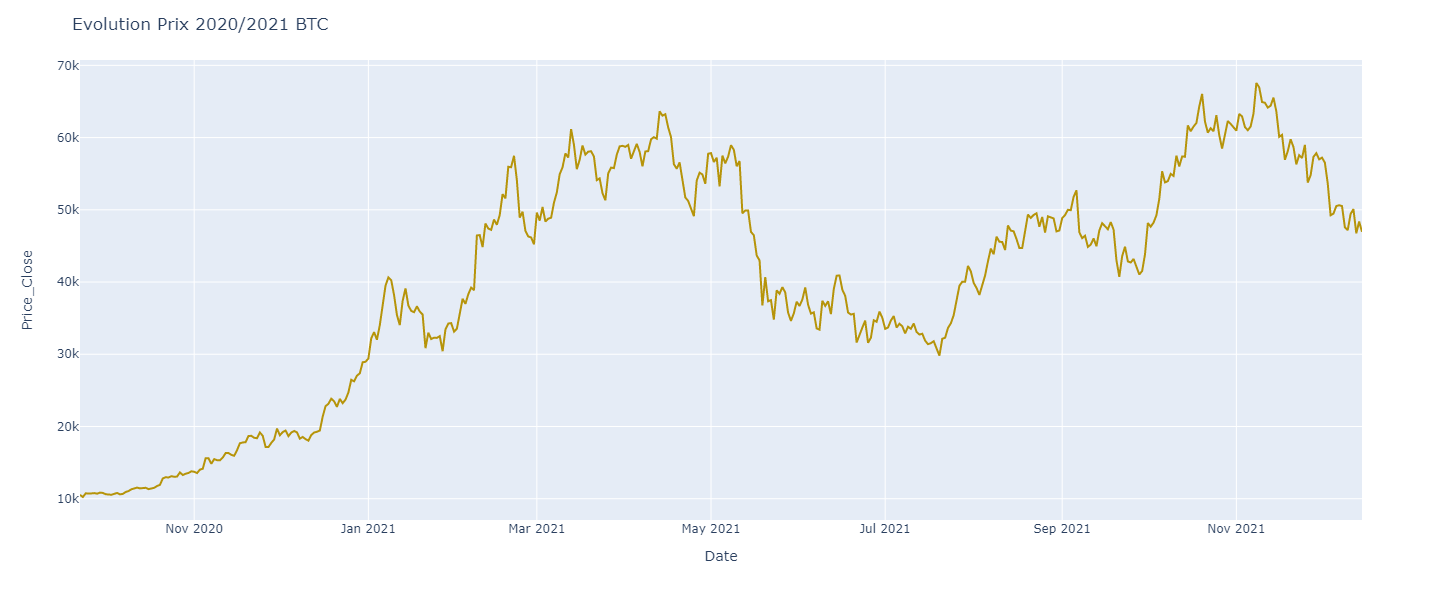

In [10]:
df = px.data.stocks()
fig = px.line(btc_20_21, x='Date', y="Price_Close")
fig['data'][0]['line']['color']='rgb(182, 148, 10)'

fig.update_layout(showlegend=False,title_text="Evolution Prix 2020/2021 BTC",height=600)

fig.show()

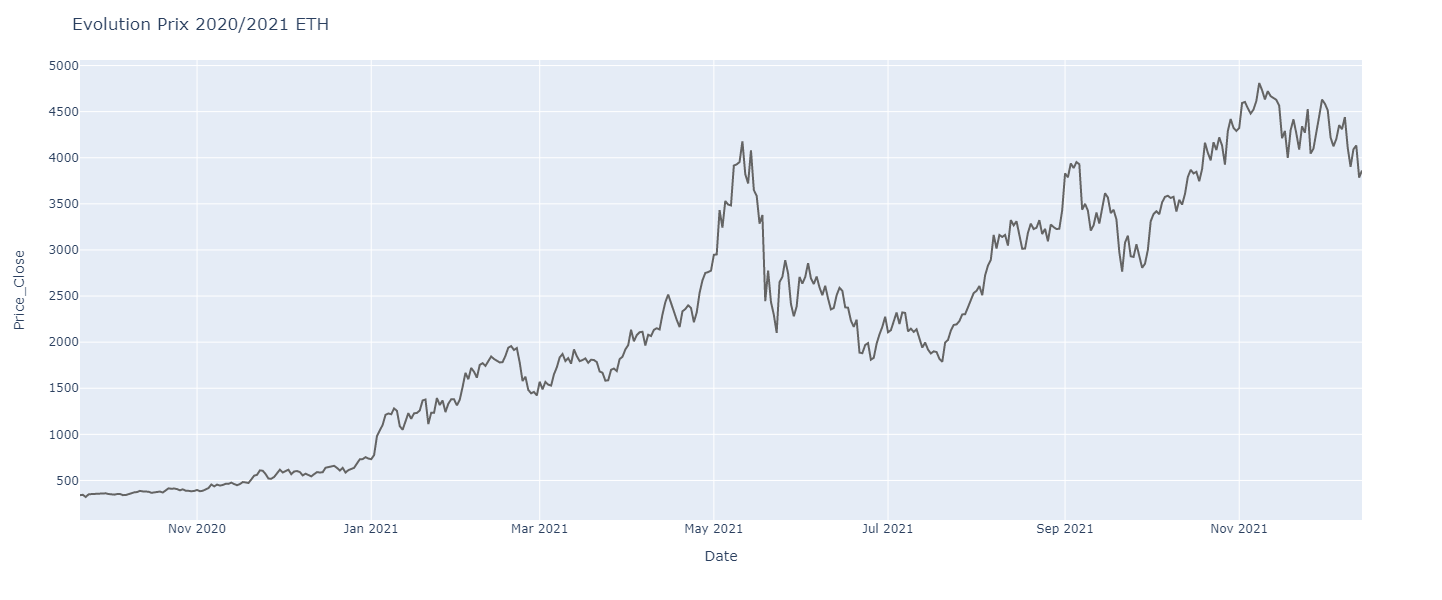

In [11]:
df = px.data.stocks()
fig = px.line(eth_20_21, x='Date', y="Price_Close")
fig['data'][0]['line']['color']='rgb(100, 100, 100)'

fig.update_layout(showlegend=False,title_text="Evolution Prix 2020/2021 ETH",height=600)

fig.show()

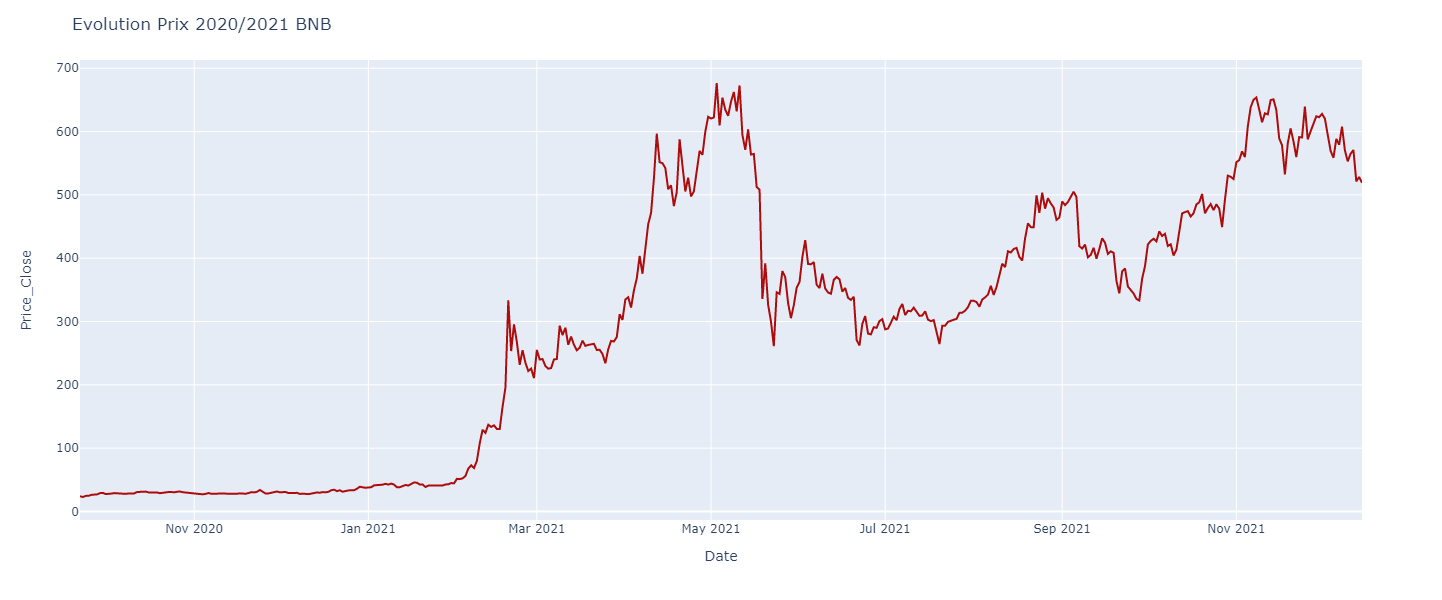

In [12]:
df = px.data.stocks()
fig = px.line(bnb_20_21, x='Date', y="Price_Close")
fig['data'][0]['line']['color']='rgb(172, 12, 12)'

fig.update_layout(showlegend=False,title_text="Evolution Prix 2020/2021 BNB",height=600)

fig.show()

In [36]:
btc_gold_20 = pd.DataFrame()

btc_gold_20 = btc_gold_20.append(cryptoAll['btc'][["Price_Close","Token","Date"]][-450:])

btc_gold_20

Price_Close Token        Date
Date                                      
2020-09-22  10531.059676   BTC  2020-09-22
2020-09-23  10236.562017   BTC  2020-09-23
2020-09-24  10739.085965   BTC  2020-09-24
2020-09-25  10692.766161   BTC  2020-09-25
2020-09-26  10732.853958   BTC  2020-09-26
...                  ...   ...         ...
2021-12-11  49413.991697   BTC  2021-12-11
2021-12-12  50095.841888   BTC  2021-12-12
2021-12-13  46734.828024   BTC  2021-12-13
2021-12-14  48371.071892   BTC  2021-12-14
2021-12-15  46950.253462   BTC  2021-12-15

[450 rows x 3 columns]

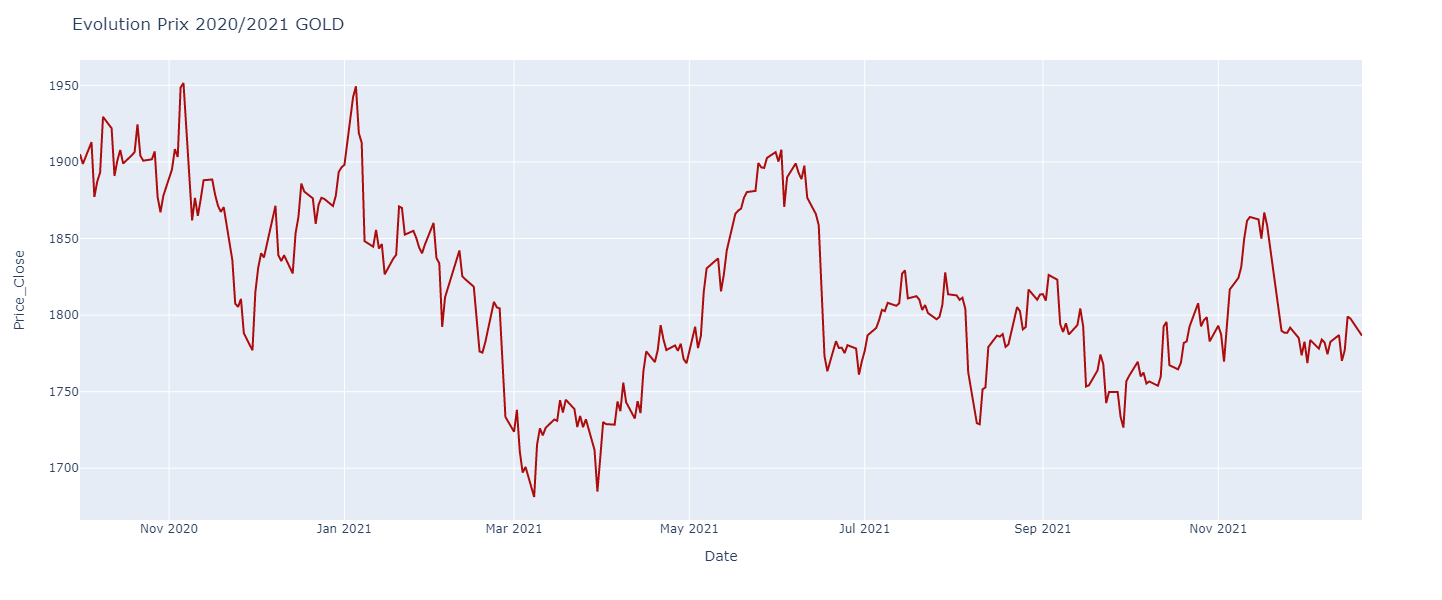

In [37]:
gold_20 = gold

df = px.data.stocks()
fig = px.line(gold_20, x='Date', y="Price_Close")
fig['data'][0]['line']['color']='rgb(172, 12, 12)'

fig.update_layout(showlegend=False,title_text="Evolution Prix 2020/2021 GOLD",height=600)

fig.show()

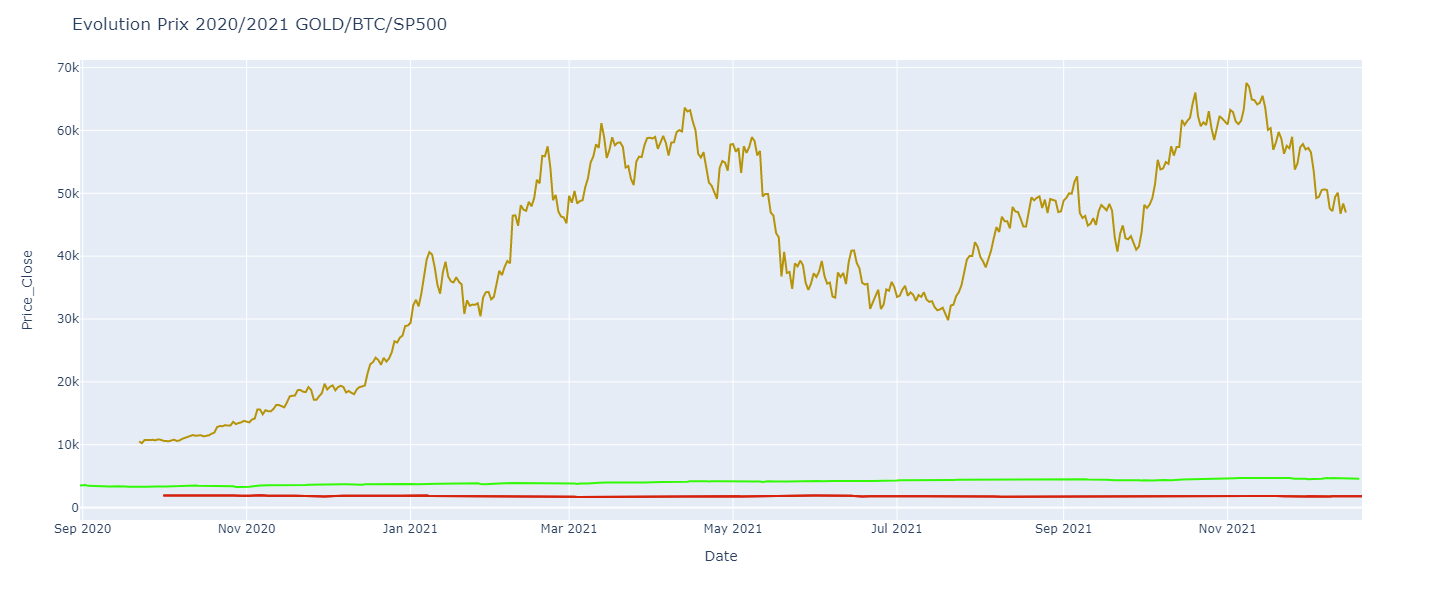

In [38]:
df = px.data.stocks()

fig.add_scatter(x=btc_20_21["Date"], y=btc_20_21["Price_Close"], line=dict(color="#B6940A"))
fig.add_scatter(x=gold_20["Date"], y=gold_20["Price_Close"], line=dict(color="#DB2208"))
fig.add_scatter(x=sp500["Date"], y=sp500["Price_Close"], line=dict(color="#32F906"))

fig.update_layout(showlegend=False,title_text="Evolution Prix 2020/2021 GOLD/BTC/SP500",height=600)

fig.show()

# Analyse de la Volatilité

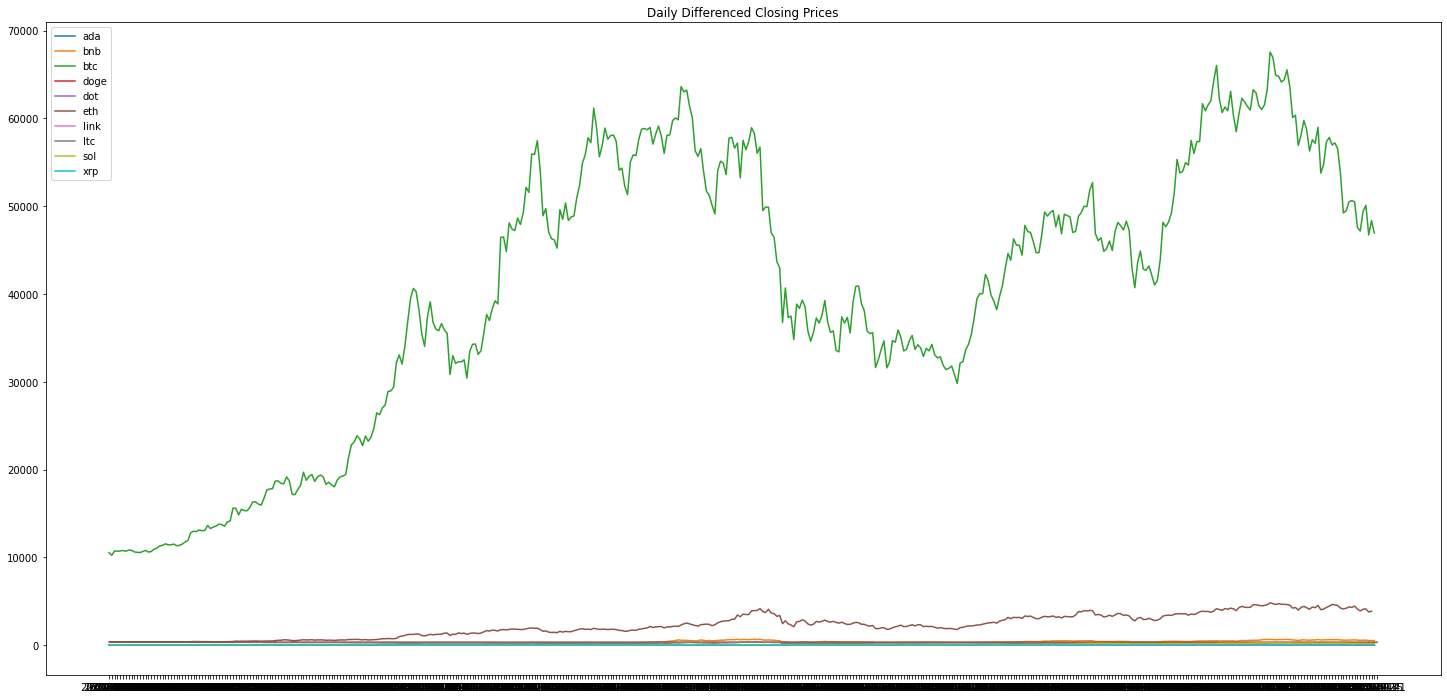

In [39]:
# Représentation de la variation du prix journalière du top 10

fig, ax = plt.subplots(figsize=(25, 12))
for coin in cryptoAll:
    plt.plot(cryptoAll[coin]['Price_Close'], label=coin)
plt.legend(loc=2)
plt.title('Daily Differenced Closing Prices')
plt.show()

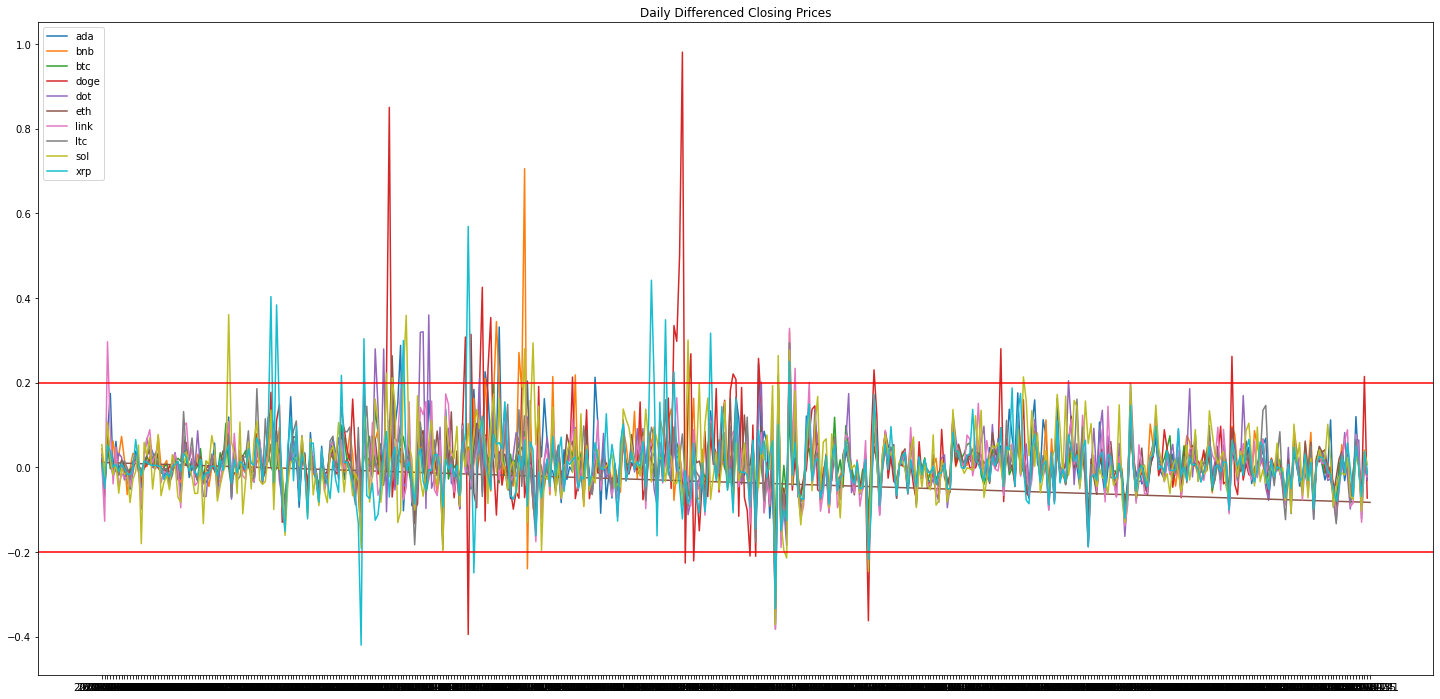

In [40]:
# Variation en % des clotures journalières
fig, ax = plt.subplots(figsize=(25, 12))
for coin in cryptoAll:
    plt.plot(cryptoAll[coin]['diff_'], label=coin)
plt.legend(loc=2)
plt.title('Daily Differenced Closing Prices')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.axhline(y=-0.2, color='r', linestyle='-')
plt.show()

### Afin d'avoir une meilleur représentation : nous allons supprimer les variations >= 1 et <= -1

In [47]:
# Query sur l'outlier et verification
cryptoAll['doge'][cryptoAll['doge']['Date'] == '2021-01-28']

Circulating_Supply  Circulating_Marketcap  Price_Close  \
Date                                                                 
2021-01-28        128023334260              961989291     0.036498   

            Volatility                @timestamp  Price_Low  \
Date                                                          
2021-01-28    6.035304  2021-01-27T23:00:00.000Z   0.007265   

            Marketcap_Dominance        Date  Price_Open Token  Price_High  \
Date                                                                        
2021-01-28             0.106227  2021-01-28    0.007433  DOGE    0.037544   

               diff_  
Date                  
2021-01-28  3.910556

In [216]:
%%html
<img src="images/doge_28_01_21.png", width=1500, height=800>

In [48]:
# Creation d'un nouveau DF pour modification
cryptodoge = cryptoAll

In [49]:
# Suppression données >= 1 / -1 variation
cryptodoge['doge'].drop(['2021-01-28'],inplace=True)

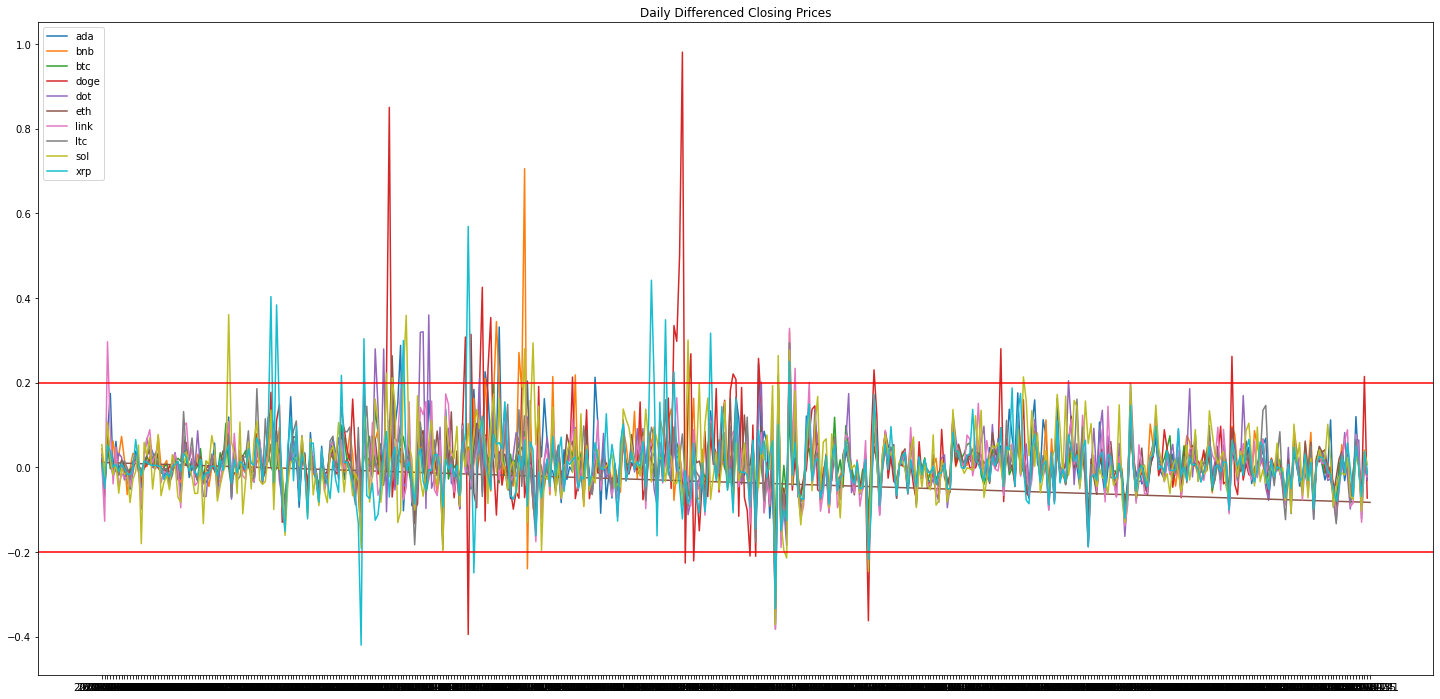

In [50]:
# Représentation des variations journalières 450 derniers jours
fig, ax = plt.subplots(figsize=(25, 12))
for coin in cryptodoge:
    plt.plot(cryptodoge[coin]['diff_'], label=coin)
plt.legend(loc=2)
plt.title('Daily Differenced Closing Prices')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.axhline(y=-0.2, color='r', linestyle='-')
plt.show()

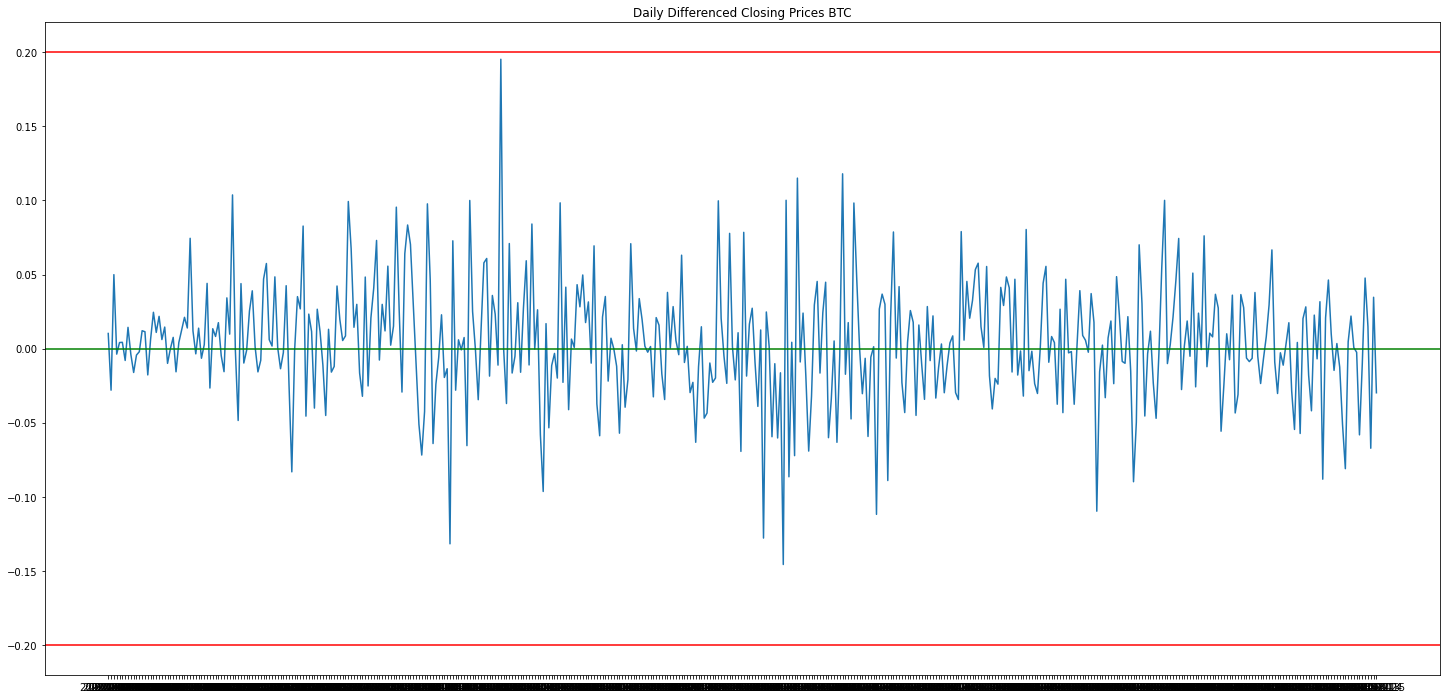

In [51]:
# Variation journalière BTC 450 derniers jours

fig, ax = plt.subplots(figsize=(25, 12))
plt.plot(cryptoAll['btc']['diff_'], label=coin)
plt.title('Daily Differenced Closing Prices BTC')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.axhline(y=-0.2, color='r', linestyle='-')
plt.axhline(y=-0, color='g', linestyle='-')
plt.show()

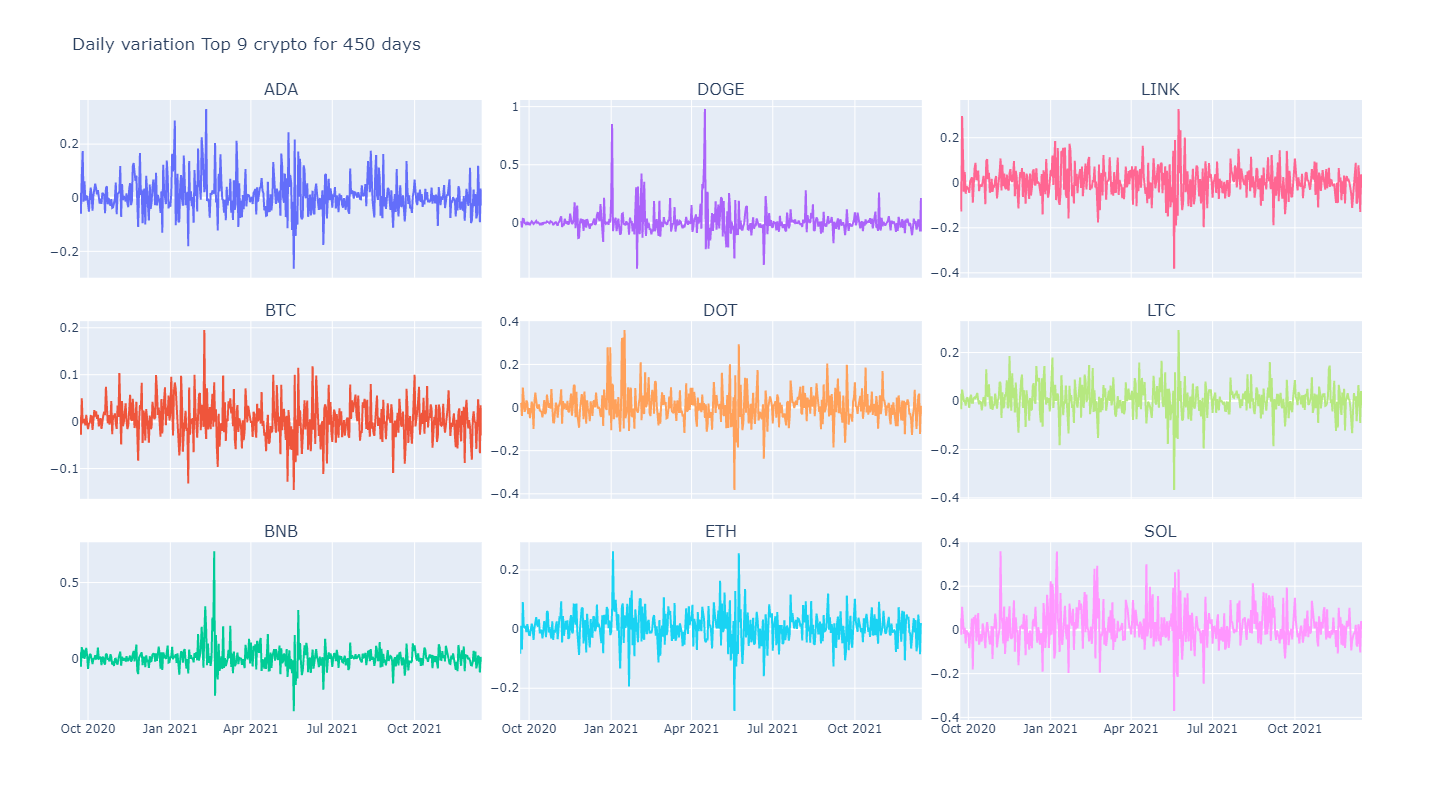

In [52]:
# Daily variation Top 9 crypto for 450 days


# Making subplots
fig = make_subplots(rows=3, cols=3, start_cell="bottom-left",vertical_spacing=0.07,horizontal_spacing=0.03,shared_yaxes=False,shared_xaxes=True,
                    subplot_titles = ("BNB", "ETH", "SOL", "BTC", "DOT", "LTC", "ADA", "DOGE", "LINK"))


# Creating subplots
fig.add_trace(go.Scatter(x=cryptoAll["ada"]["Date"],y=cryptoAll["ada"]["diff_"],showlegend=False,mode="lines",name="DV_ADA"),row=3, col=1)
fig.add_trace(go.Scatter(x=cryptoAll["btc"]["Date"],y=cryptoAll["btc"]["diff_"],showlegend=False,mode="lines",name="DV_BTC"),row=2, col=1)
fig.add_trace(go.Scatter(x=cryptoAll["bnb"]["Date"],y=cryptoAll["bnb"]["diff_"],showlegend=False,mode="lines",name="DV_BNB"),row=1, col=1)
fig.add_trace(go.Scatter(x=cryptodoge["doge"]["Date"],y=cryptodoge["doge"]["diff_"],showlegend=False,mode="lines",name="DV_DOGE"),row=3, col=2)
fig.add_trace(go.Scatter(x=cryptoAll["dot"]["Date"],y=cryptoAll["dot"]["diff_"],showlegend=False,mode="lines",name="DV_DOT"),row=2, col=2)
fig.add_trace(go.Scatter(x=cryptoAll["eth"]["Date"],y=cryptoAll["eth"]["diff_"],showlegend=False,mode="lines",name="DV_ETH"),row=1, col=2)
fig.add_trace(go.Scatter(x=cryptoAll["link"]["Date"],y=cryptoAll["link"]["diff_"],showlegend=False,mode="lines",name="DV_LINK"),row=3, col=3)
fig.add_trace(go.Scatter(x=cryptoAll["ltc"]["Date"],y=cryptoAll["ltc"]["diff_"],showlegend=False,mode="lines",name="DV_LTC"),row=2, col=3)
fig.add_trace(go.Scatter(x=cryptoAll["sol"]["Date"],y=cryptoAll["sol"]["diff_"],showlegend=False,mode="lines",name="DV_SOL"),row=1, col=3)


# Updating Layout
fig.update_layout(height=800,showlegend=True,title_text="Daily variation Top 9 crypto for 450 days",)

#Showing result
fig.show()

## Comparaison avec valeurs refuge (or) et investissement classique (S&P500)

In [53]:
# Recuperation des données historique du BTC
btc_g = cryptoAll['btc'][['Date','diff_']]
btc_g

Date     diff_
Date                            
2020-09-22  2020-09-22  0.010235
2020-09-23  2020-09-23 -0.028015
2020-09-24  2020-09-24  0.049907
2020-09-25  2020-09-25 -0.003696
2020-09-26  2020-09-26  0.004111
...                ...       ...
2021-12-11  2021-12-11  0.047617
2021-12-12  2021-12-12  0.014881
2021-12-13  2021-12-13 -0.067184
2021-12-14  2021-12-14  0.034646
2021-12-15  2021-12-15 -0.029768

[450 rows x 2 columns]

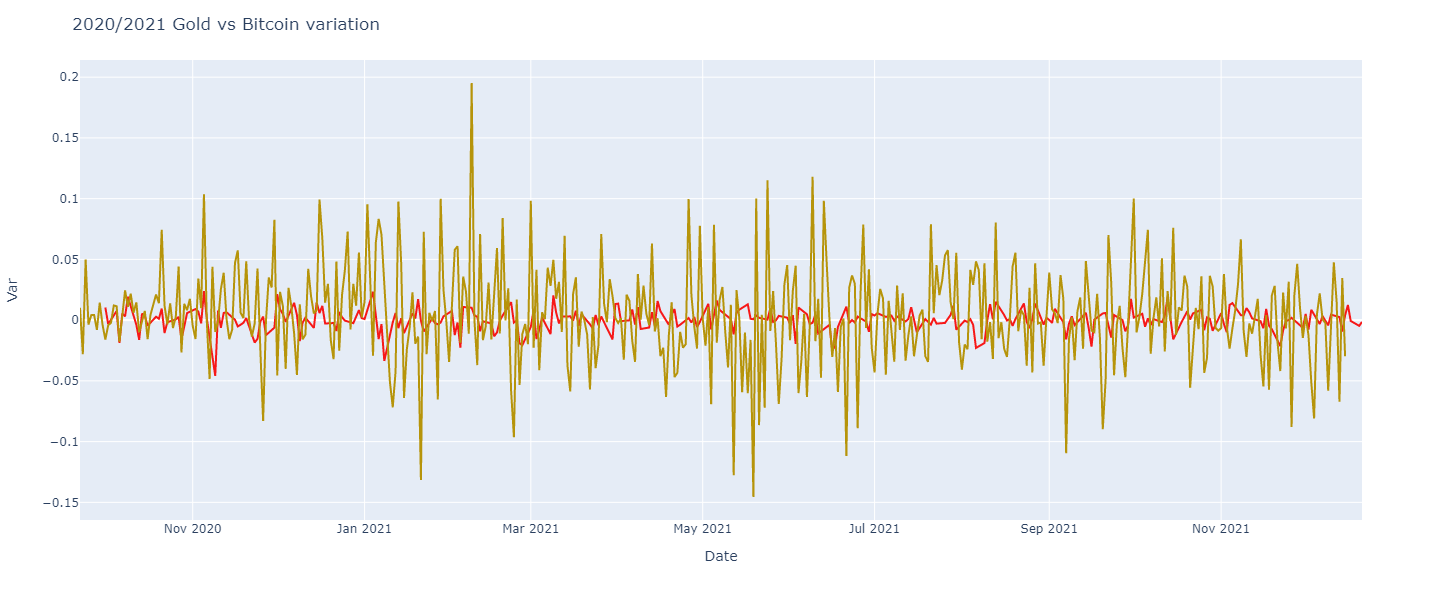

In [54]:
fig = px.line(gold, x="Date", y="Var")
fig['data'][0]['line']['color']='rgb(247, 24, 24)'

fig.add_scatter(x=btc_g["Date"], y=btc_g["diff_"], line=dict(color="#B6940A"))

fig.update_layout(showlegend=False,title_text="2020/2021 Gold vs Bitcoin variation",height=600)

fig.show()

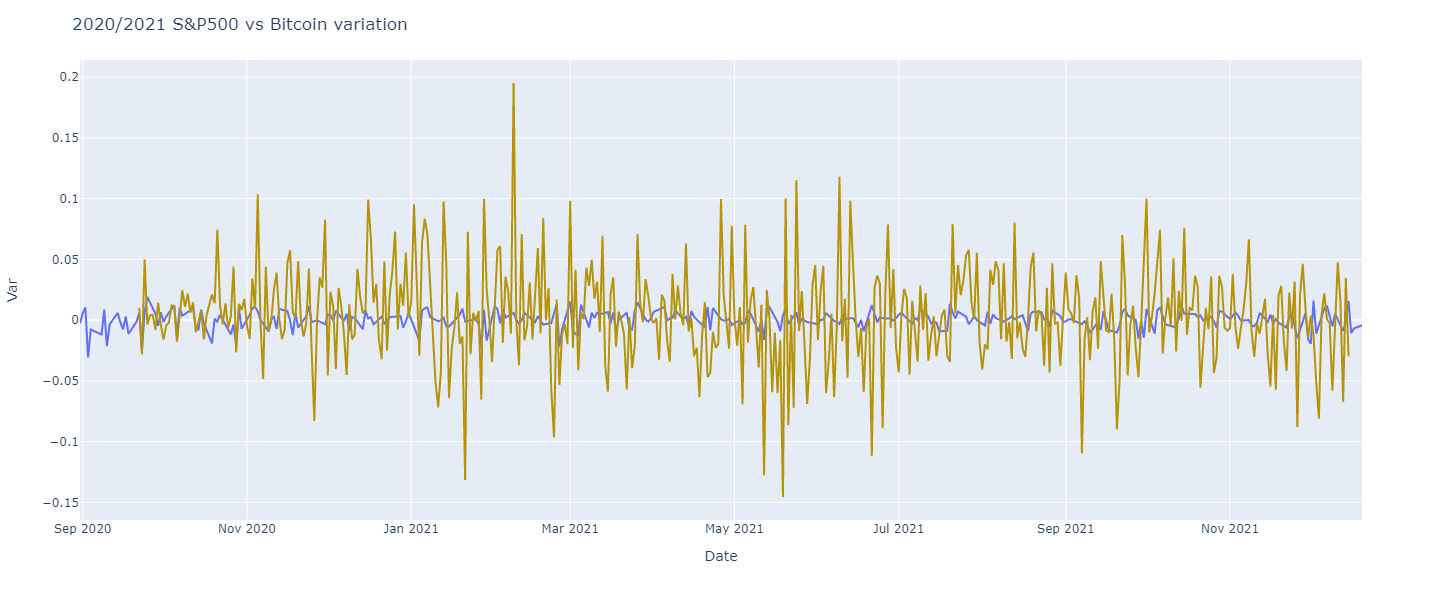

In [55]:
fig = px.line(sp500, x="Date", y="Var",)
fig.add_scatter(x=btc_g["Date"], y=btc_g["diff_"],line=dict(color="#B6940A"))

fig.update_layout(showlegend=False,title_text="2020/2021 S&P500 vs Bitcoin variation",height=600)

fig.show()

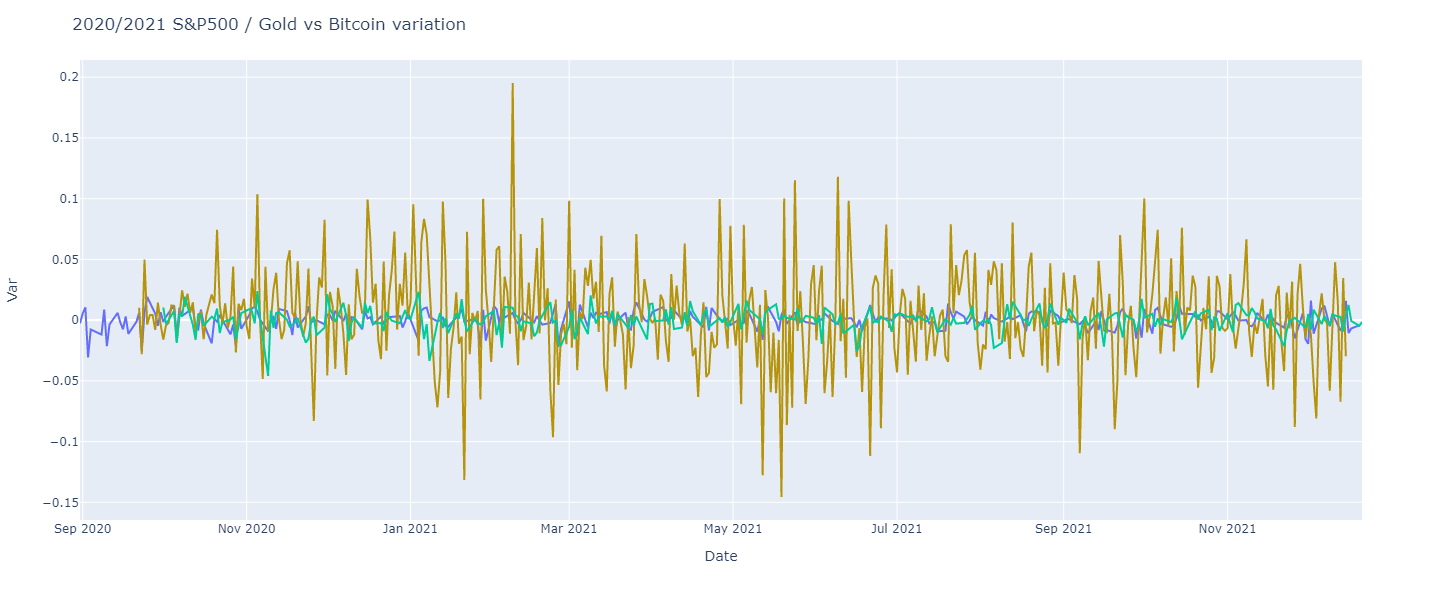

In [56]:
fig = px.line(sp500, x="Date", y="Var",)
fig.add_scatter(x=btc_g["Date"], y=btc_g["diff_"],line=dict(color="#B6940A"))
fig.add_scatter(x=gold["Date"], y=gold["Var"])

fig.update_layout(showlegend=False,title_text="2020/2021 S&P500 / Gold vs Bitcoin variation",height=600)

fig.show()

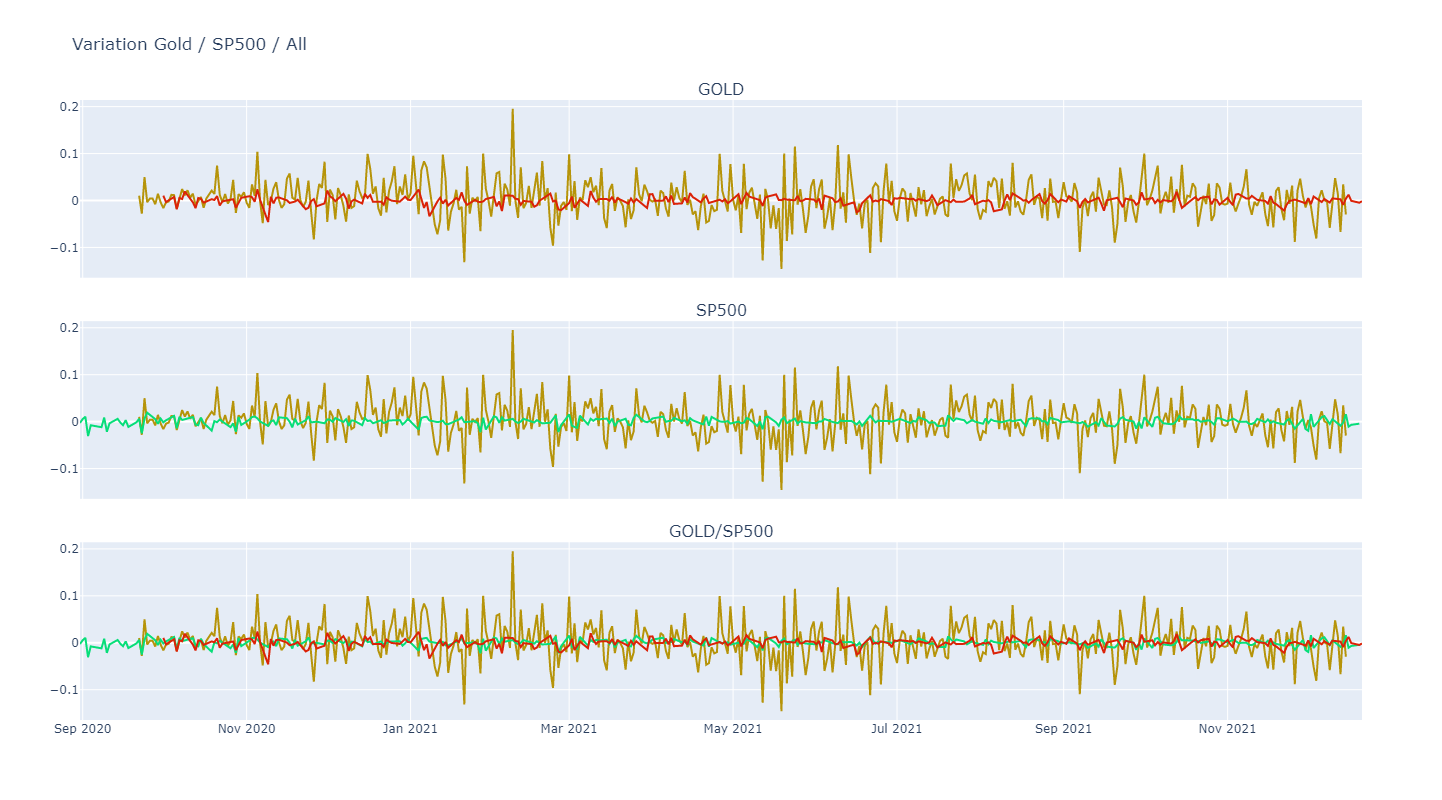

In [57]:
# Subplots Variation Gold / SP500 / ALL 


# Making subplots
fig = make_subplots(rows=3, cols=1, start_cell="bottom-left",vertical_spacing=0.07,horizontal_spacing=0.03,shared_yaxes=False,shared_xaxes=True,
                    subplot_titles = ("GOLD/SP500","SP500", "GOLD"))


# Creating subplots
fig.add_trace(go.Scatter(x=btc_g["Date"], y=btc_g["diff_"],showlegend=False,line=dict(color="#B6940A")),row=3, col=1)
fig.add_trace(go.Scatter(x=gold["Date"], y=gold["Var"],showlegend=False,line=dict(color="#DB2208")),row=3, col=1)
fig.add_trace(go.Scatter(x=btc_g["Date"], y=btc_g["diff_"],showlegend=False,line=dict(color="#B6940A")),row=2, col=1)
fig.add_trace(go.Scatter(x=sp500["Date"], y=sp500["Var"],showlegend=False,line=dict(color="#07DE79")),row=2, col=1)
fig.add_trace(go.Scatter(x=btc_g["Date"], y=btc_g["diff_"],showlegend=False,line=dict(color="#B6940A")),row=1, col=1)
fig.add_trace(go.Scatter(x=sp500["Date"], y=sp500["Var"],showlegend=False,line=dict(color="#07DE79")),row=1, col=1)
fig.add_trace(go.Scatter(x=gold["Date"], y=gold["Var"],showlegend=False,line=dict(color="#DB2208")),row=1, col=1) 

# Updating Layout
fig.update_layout(height=800,showlegend=True,title_text="Variation Gold / SP500 / All",)

# Updating annotations

#Showing result
fig.show()

# Analyse de la Dominance

In [58]:
marketcap_dec_20 = pd.DataFrame()
marketcap_dec_21 = pd.DataFrame()

for coin in cryptoAll:
    marketcap_dec_20 = marketcap_dec_20.append(cryptoAll[coin][["Circulating_Marketcap","Token"]][-361:-360])
    marketcap_dec_21 = marketcap_dec_21.append(cryptoAll[coin][["Circulating_Marketcap","Token"]][-10:-9])

marketcap_dec_20 = marketcap_dec_20.sort_values(by=["Circulating_Marketcap","Token"],ascending=True)
marketcap_dec_21 = marketcap_dec_21.sort_values(by=["Circulating_Marketcap","Token"],ascending=True)

marketcap_dec_21

Circulating_Marketcap Token
Date                                   
2021-12-06             9108609600  LINK
2021-12-06            10820007261   LTC
2021-12-06            22730276069  DOGE
2021-12-06            27991881614   DOT
2021-12-06            38058342373   XRP
2021-12-06            45980115703   ADA
2021-12-06            60063220243   SOL
2021-12-06            93145375225   BNB
2021-12-05           489003968143   ETH
2021-12-06           933812857908   BTC

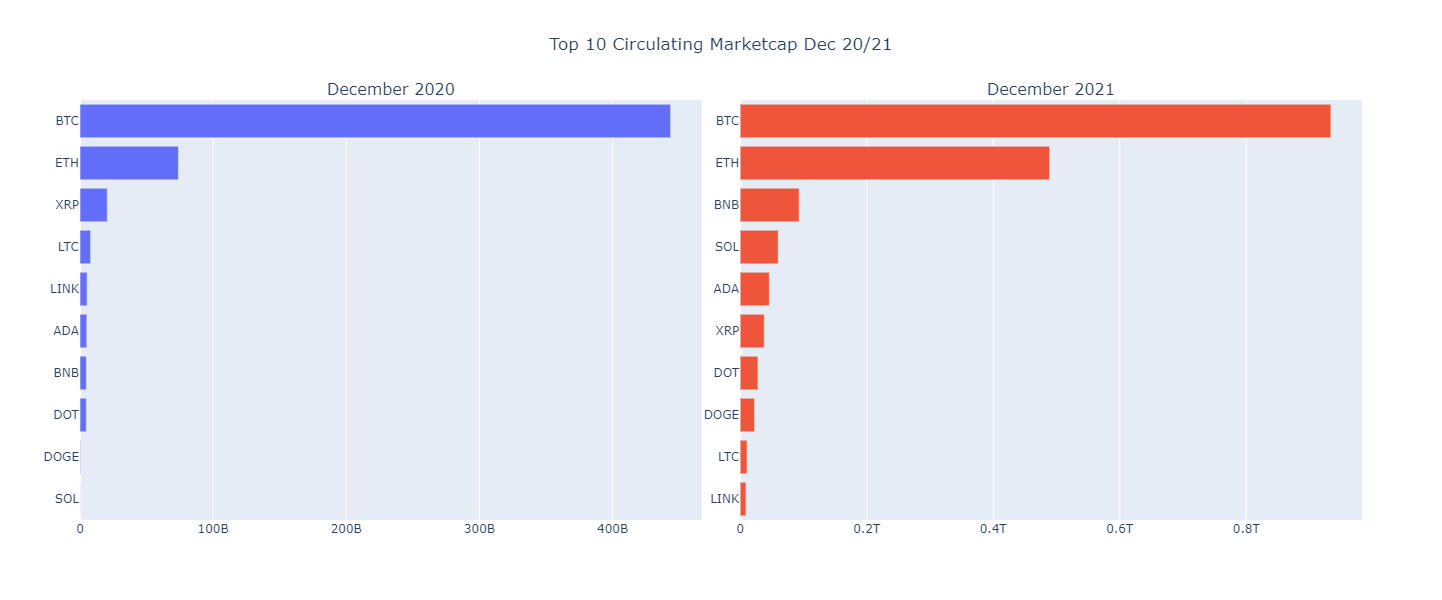

In [59]:
fig = make_subplots(rows=1, cols=2, start_cell="bottom-left",vertical_spacing=0.07,horizontal_spacing=0.03,shared_yaxes=False,shared_xaxes=False,
                    subplot_titles = ("December 2020", "December 2021"))

labels_dec_20 = marketcap_dec_20['Token']
labels_dec_21 = marketcap_dec_21['Token']
values_dec20 = marketcap_dec_20['Circulating_Marketcap']
values_dec21 = marketcap_dec_21['Circulating_Marketcap']

fig.add_trace(go.Bar(x=values_dec20, y=labels_dec_20, orientation='h'),1,1)
fig.add_trace(go.Bar(x=values_dec21, y=labels_dec_21, orientation='h'),1,2)

fig.update_layout(showlegend=False,
                  title_text="Top 10 Circulating Marketcap Dec 20/21",height=600,
                  title_x=0.5)

fig.show()

In [60]:
# Creation colomne pour la dominance par Token
for coin in cryptoAll:
    pd.DatetimeIndex(crypto[coin]['Date'])
    #cryptoAll[coin] = crypto[coin].set_index(crypto[coin]['Date'])
    
for coin in cryptoAll:
        cryptoAll[coin]['Pour_dominance'] = cryptoAll[coin]['Marketcap_Dominance']/100
    
cryptoAll['btc']

Price_Open        Date     Price_Low Token  Marketcap_Dominance  \
Date                                                                            
2020-09-22  10424.361288  2020-09-22  10356.578208   BTC            59.593220   
2020-09-23  10531.601015  2020-09-23  10134.146101   BTC            59.453556   
2020-09-24  10228.611397  2020-09-24  10192.875734   BTC            60.033995   
2020-09-25  10732.434181  2020-09-25  10558.032527   BTC            59.576501   
2020-09-26  10688.910122  2020-09-26  10653.902034   BTC            58.993189   
...                  ...         ...           ...   ...                  ...   
2021-12-11  47167.986090  2021-12-11  46787.423663   BTC            40.511734   
2021-12-12  49361.294635  2021-12-12  48669.019367   BTC            40.650263   
2021-12-13  50100.819677  2021-12-13  45716.686036   BTC            40.749060   
2021-12-14  46751.316367  2021-12-14  46323.053310   BTC            41.151912   
2021-12-15  48390.750227  2021-12-15  46559.243397   BTC            52.635569   

             Price_Close                @timestamp    Price_High  Volatility  \
Date                                                                           
2020-09-22  10531.059676  2020-09-21T22:00:00.000Z  10577.613872    0.537293   
2020-09-23  10236.562017  2020-09-22T22:00:00.000Z  10543.698781    0.536457   
2020-09-24  10739.085965  2020-09-23T22:00:00.000Z  10799.381213    0.553097   
2020-09-25  10692.766161  2020-09-24T22:00:00.000Z  10766.641038    0.557722   
2020-09-26  10732.853958  2020-09-25T22:00:00.000Z  10831.218920    0.556618   
...                  ...                       ...           ...         ...   
2021-12-11  49413.991697  2021-12-10T23:00:00.000Z  49513.222021    0.642340   
2021-12-12  50095.841888  2021-12-11T23:00:00.000Z  50810.775298    0.661497   
2021-12-13  46734.828024  2021-12-12T23:00:00.000Z  50222.799450    0.677106   
2021-12-14  48371.071892  2021-12-13T23:00:00.000Z  48700.987045    0.688783   
2021-12-15  46950.253462  2021-12-14T23:00:00.000Z  48810.659414    0.698771   

            Circulating_Supply  Circulating_Marketcap     diff_  \
Date                                                              
2020-09-22            18503580           192800456206  0.010235   
2020-09-23            18504469           194941021863 -0.028015   
2020-09-24            18505326           189537496899  0.049907   
2020-09-25            18506383           198791610657 -0.003696   
2020-09-26            18507322           197910806345  0.004111   
...                        ...                    ...       ...   
2021-12-11            18897443           891354328562  0.047617   
2021-12-12            18898412           932850082860  0.014881   
2021-12-13            18899293           946870070610 -0.067184   
2021-12-14            18900156           883607172534  0.034646   
2021-12-15            18900843           914625972690 -0.029768   

            Pour_dominance  
Date                        
2020-09-22        0.595932  
2020-09-23        0.594536  
2020-09-24        0.600340  
2020-09-25        0.595765  
2020-09-26        0.589932  
...                    ...  
2021-12-11        0.405117  
2021-12-12        0.406503  
2021-12-13        0.407491  
2021-12-14        0.411519  
2021-12-15        0.526356  

[450 rows x 13 columns]

In [61]:
data_dec_20 = pd.DataFrame()
data_dec_21 = pd.DataFrame()

for coin in cryptoAll:
    data_dec_21 = data_dec_21.append(cryptoAll[coin][["Pour_dominance","Token"]][-1:])
    data_dec_20 = data_dec_20.append(cryptoAll[coin][["Pour_dominance","Token"]][-365:-364])

data_dec_21

Pour_dominance Token
Date                            
2021-12-15        0.024766   ADA
2021-12-15        0.051540   BNB
2021-12-15        0.526356   BTC
2021-12-15        0.014791  DOGE
2021-12-15        0.015124   DOT
2021-12-14        0.209251   ETH
2021-12-15        0.005042  LINK
2021-12-15        0.006088   LTC
2021-12-15        0.029041   SOL
2021-12-15        0.022398   XRP

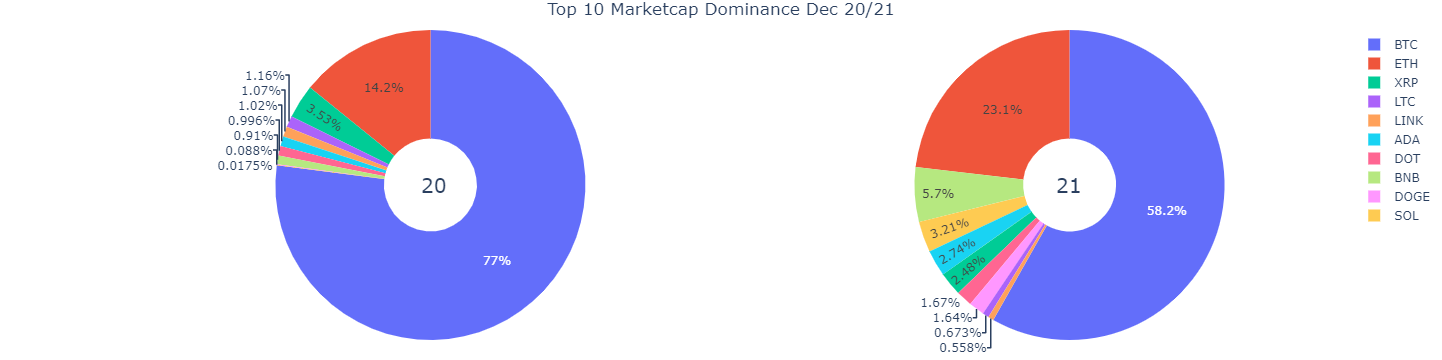

In [62]:
labels_dec_20 = data_dec_20['Token']
labels_dec_21 = data_dec_21['Token']
values_dec20 = data_dec_20['Pour_dominance']
values_dec21 = data_dec_21['Pour_dominance']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_dec_20, values=values_dec20, name="Dec_20"),1, 1)
fig.add_trace(go.Pie(labels=labels_dec_21, values=values_dec21, name="Dec_21"),1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.30, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Top 10 Marketcap Dominance Dec 20/21",
        # Add annotations in the center of the donut pies.
    annotations=[dict(text='20', x=0.215, y=0.5, font_size=20, showarrow=False),
                 dict(text='21', x=0.787, y=0.5, font_size=20, showarrow=False)],
    title_x=0.5)

fig.update_layout(margin=dict(t=30, b=0, l=35, r=35))

fig.show()

# Visualisation du Marketcap supply

In [80]:
btc_supply = pd.DataFrame()
btc_supply = crypto['btc'][["Date","Token","Circulating_Supply","Price_Close"]]

In [81]:
btc_supply

Date Token  Circulating_Supply   Price_Close
Date                                                          
2016-12-17  2016-12-17   BTC            16052023    788.810007
2016-12-18  2016-12-18   BTC            16053789    790.028485
2016-12-19  2016-12-19   BTC            16055679    789.359193
2016-12-20  2016-12-20   BTC            16057408    798.499624
2016-12-21  2016-12-21   BTC            16059400    828.844569
...                ...   ...                 ...           ...
2021-12-11  2021-12-11   BTC            18897443  49413.991697
2021-12-12  2021-12-12   BTC            18898412  50095.841888
2021-12-13  2021-12-13   BTC            18899293  46734.828024
2021-12-14  2021-12-14   BTC            18900156  48371.071892
2021-12-15  2021-12-15   BTC            18900843  46950.253462

[1825 rows x 4 columns]

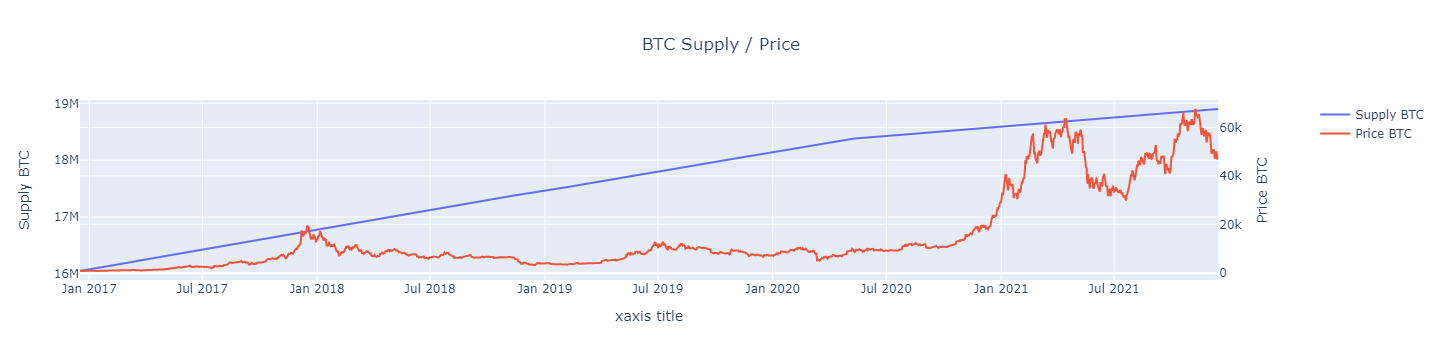

In [82]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=btc_supply['Date'], y=btc_supply['Circulating_Supply'], name="Supply BTC"),secondary_y=False,)
fig.add_trace(go.Scatter(x=btc_supply['Date'], y=btc_supply['Price_Close'], name="Price BTC"),secondary_y=True,)

# Add figure title
fig.update_layout(title_text="BTC Supply / Price", title_x=0.5)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="Supply BTC", secondary_y=False)
fig.update_yaxes(title_text="Price BTC", secondary_y=True)

fig.show()